In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings

In [10]:
datos=pd.read_csv('train_total.csv')
train_labels=['countryName', 'eprtrSectorName', 'EPRTRAnnexIMainActivityLabel',
       'FacilityInspireID', 'facilityName', 'City', 'targetRelease',
       'pollutant', 'reportingYear', 'MONTH', 'DAY', 'CONTINENT',
       'max_wind_speed', 'avg_wind_speed', 'min_wind_speed', 'max_temp',
       'avg_temp', 'min_temp', 'DAY WITH FOGS', 'REPORTER NAME', 'CITY ID']
datos=datos[train_labels]
datos.mean(axis=0)

countryName                        17.411379
eprtrSectorName                     4.173661
EPRTRAnnexIMainActivityLabel       50.600293
FacilityInspireID                3762.026056
facilityName                     3955.828305
City                             2477.424727
targetRelease                       0.000000
pollutant                           1.045986
reportingYear                       5.935043
MONTH                               5.489974
DAY                                13.517203
CONTINENT                           0.000000
max_wind_speed                  28514.979612
avg_wind_speed                  28535.734900
min_wind_speed                  28543.393003
max_temp                        28530.455553
avg_temp                        28525.803026
min_temp                        28521.519443
DAY WITH FOGS                       2.232568
REPORTER NAME                   22495.828366
CITY ID                          2601.042390
dtype: float64

In [11]:
datos.var(axis=0)

countryName                     9.302661e+01
eprtrSectorName                 6.954634e+00
EPRTRAnnexIMainActivityLabel    2.804410e+02
FacilityInspireID               4.554978e+06
facilityName                    5.311566e+06
City                            2.260727e+06
targetRelease                   0.000000e+00
pollutant                       7.437063e-01
reportingYear                   1.485066e+01
MONTH                           1.190825e+01
DAY                             6.556679e+01
CONTINENT                       0.000000e+00
max_wind_speed                  2.713383e+08
avg_wind_speed                  2.710482e+08
min_wind_speed                  2.711225e+08
max_temp                        2.716524e+08
avg_temp                        2.716585e+08
min_temp                        2.716586e+08
DAY WITH FOGS                   1.427652e+01
REPORTER NAME                   1.657589e+08
CITY ID                         2.273769e+06
dtype: float64

In [12]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [13]:
modelo_pca = pca_pipe.named_steps['pca']

In [15]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7', 'PC8','PC9', 'PC10',
               'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
               'PC20', 'PC21']
)

,countryName,eprtrSectorName,EPRTRAnnexIMainActivityLabel,FacilityInspireID,facilityName,City,targetRelease,pollutant,reportingYear,MONTH,...,CONTINENT,max_wind_speed,avg_wind_speed,min_wind_speed,max_temp,avg_temp,min_temp,DAY WITH FOGS,REPORTER NAME,CITY ID
PC1,-8.955118e-03,-4.734299e-04,2.122006e-03,-2.564513e-03,3.719492e-04,-4.613854e-05,-3.469447e-18,-1.449666e-03,-2.377202e-03,1.390729e-01,...,-0.000000e+00,1.473697e-02,1.704894e-02,1.235221e-02,-5.698453e-01,-5.747620e-01,-5.698848e-01,-5.961311e-03,-5.080439e-04,-4.401965e-03
PC2,-1.238364e-03,-3.040633e-03,8.469769e-03,3.305461e-03,-5.644594e-03,5.876762e-03,0.000000e+00,4.914701e-03,-1.103563e-02,3.554702e-03,...,2.710505e-20,-5.605006e-01,-6.093112e-01,-5.598126e-01,-1.478049e-02,-1.497036e-02,-1.420987e-02,8.434945e-03,3.479736e-03,9.823385e-03
PC3,5.792315e-01,4.270337e-02,1.722885e-01,4.205295e-01,-5.921349e-02,-2.518619e-01,-8.673617e-19,1.090195e-02,-3.995358e-02,-4.468362e-03,...,0.000000e+00,5.890724e-03,4.078159e-03,3.931498e-03,-5.938415e-03,-6.016900e-03,-6.383107e-03,6.075663e-01,-4.226116e-03,1.344685e-01
PC4,8.330237e-02,6.871976e-01,-5.978323e-01,9.737410e-02,-5.229566e-02,4.373244e-03,-4.163336e-17,9.594805e-03,2.658051e-01,1.406621e-02,...,5.551115e-17,-2.894048e-04,-7.894270e-03,-1.107070e-02,-7.723393e-04,-4.400978e-04,-2.798763e-05,4.914254e-02,5.701026e-02,-2.692870e-01
PC5,7.695338e-02,-3.715010e-02,1.025978e-01,-3.497179e-01,-7.675919e-01,-4.236900e-01,1.040834e-16,8.647527e-02,1.675128e-02,3.644362e-02,...,-2.220446e-16,-7.347250e-04,-5.945667e-04,1.444208e-03,3.474661e-03,3.482660e-03,4.321781e-03,-5.304339e-02,3.449614e-02,-2.413689e-01
PC6,7.600833e-02,-6.805154e-02,2.078134e-01,-1.019880e-01,-5.009865e-02,8.804759e-02,1.387779e-16,-5.490759e-01,5.834631e-01,6.112927e-03,...,5.551115e-17,-2.865812e-03,-6.960466e-03,-4.525513e-03,2.309338e-04,3.603571e-04,-7.382333e-04,3.499928e-02,3.645519e-01,-5.803823e-02
PC7,6.297050e-02,-1.220619e-01,1.163035e-01,7.350773e-04,1.298365e-01,2.061252e-01,-8.326673e-17,5.384160e-01,7.556925e-02,1.476665e-01,...,-0.000000e+00,2.925272e-03,2.281336e-03,3.668567e-03,1.142152e-02,1.184852e-02,1.156593e-02,7.905131e-02,6.877673e-01,-2.819865e-01
PC8,-3.105321e-02,8.823829e-03,-1.677427e-01,2.215590e-03,-1.075988e-01,-1.338718e-01,3.400058e-16,4.000136e-01,-1.372652e-01,3.489633e-02,...,-2.775558e-17,-1.769598e-03,7.599398e-04,-3.517374e-03,2.177507e-03,2.533282e-03,2.213776e-03,-5.042388e-02,7.788545e-02,1.556828e-01
PC9,1.246258e-01,-8.226676e-02,2.241795e-01,-5.323731e-02,4.203982e-02,2.939835e-01,-0.000000e+00,2.808980e-01,3.154205e-01,5.776117e-02,...,1.387779e-16,-6.430186e-03,-5.227874e-03,1.282579e-03,5.384309e-03,4.845788e-03,3.964230e-03,1.076248e-01,-6.012915e-01,-5.023255e-01
PC10,-2.385417e-02,-1.026298e-01,-8.931626e-02,-7.570314e-02,2.571248e-02,-1.610025e-01,2.775558e-17,3.808514e-01,6.490223e-01,-1.969878e-01,...,6.938894e-17,-6.937881e-04,1.845993e-04,-1.361202e-03,-1.715602e-02,-1.874733e-02,-1.885771e-02,-4.055044e-02,-1.086337e-01,5.391519e-01


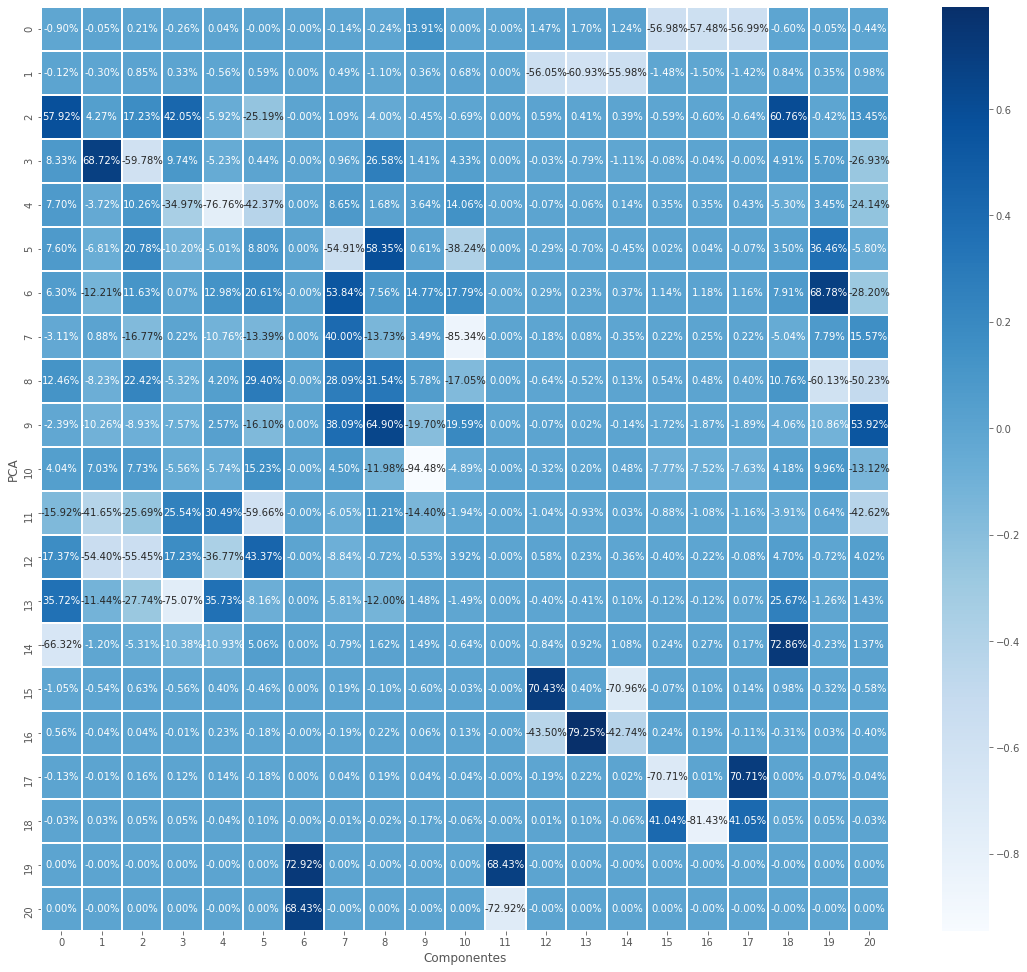

In [18]:
aux=modelo_pca.components_
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux, annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Componentes');ax.set_ylabel('PCA'); 
#ax.set_title('Confusion Matrix'); 